### IPL 2022 Capstone Project

**The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.**

**These are some of the important columns that we'll focus on for meaningful insights in this project.**

**column names: Variable Type**
* date : string  
* venue : string  
* stage : string  
* team1 : string  
* team2 : string  
* toss_winner : string  
* toss_decision : string  
* first_ings_score : integer  
* second_ings_score : integer  
* match_winner : string  
* won_by : string  
* margin : integer  
* player_of_the_match : string  
* top_scorer : string  
* highscore : integer  
* best_bowling : string  
* best_bowling_fgure : string  
gure : string  


### Loading the Libraries and Dataset

In [288]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

df= pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Basic Information

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Check the size of rows and columns of the dataset

In [294]:
print(f"your rows are {df.shape[0]}, and columns are {df.shape[1]}")

your rows are 74, and columns are 20


Now let's see how many columns have null values in total.

In [297]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

**Now, Here comes some Basic Questions**

1. Which team won the most matches?

Text(0, 0.5, 'Team')

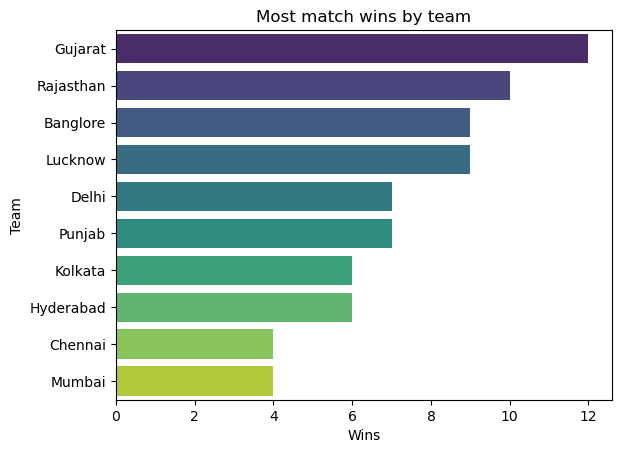

In [303]:
match_wins = df['match_winner'].value_counts()
sns.barplot(x = match_wins.values,y = match_wins.index,palette='viridis')
plt.title('Most match wins by team')
plt.xlabel('Wins')
plt.ylabel('Team')

2. Toss Decision Trends

Text(0.5, 1.0, 'Toss Decision Count')

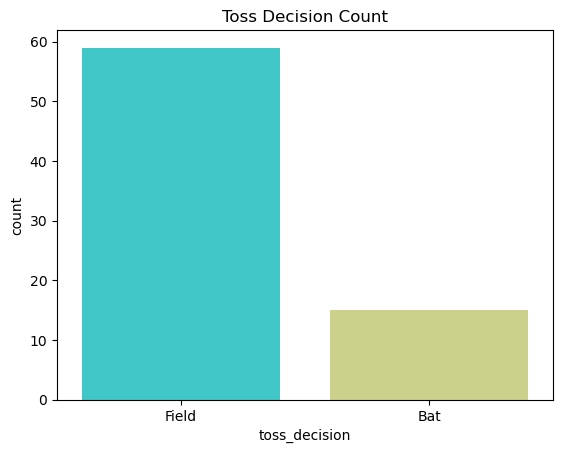

In [306]:
sns.countplot(x = df['toss_decision'],palette='rainbow')
plt.title('Toss Decision Count')

3. Toss Winner vs Match Winner

In [309]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count*100)/df.shape[0]
percentage.round(2)

48.65

4. How do teams win? (Runs vs Wickets)

Text(0.5, 1.0, 'won By ')

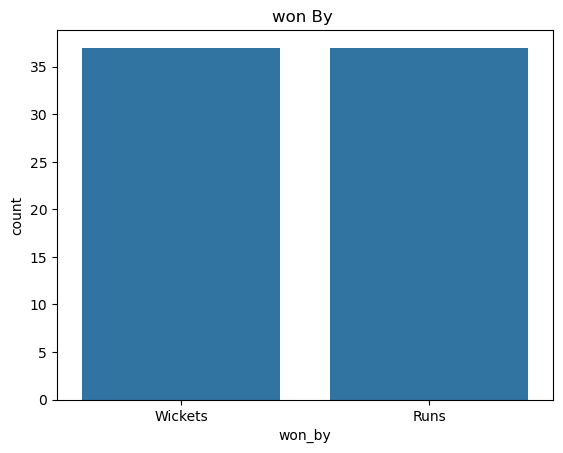

In [312]:
sns.countplot(x = df['won_by'])
plt.title("won By ")

###  Key Player Performances

1 Most "Player of the Match" Awards

Text(0.5, 1.0, 'Top 10 Player od the match')

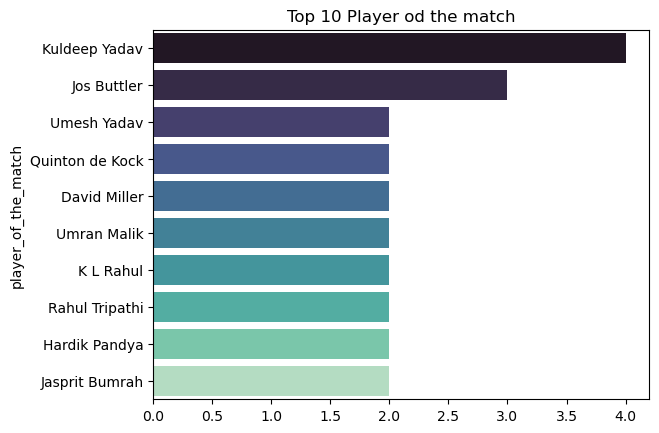

In [316]:
count = df['player_of_the_match'].value_counts().head(10)
sns.barplot(x = count.values,y = count.index,palette='mako')
plt.title("Top 10 Player od the match")

2 Top Scorers

<Axes: ylabel='top_scorer'>

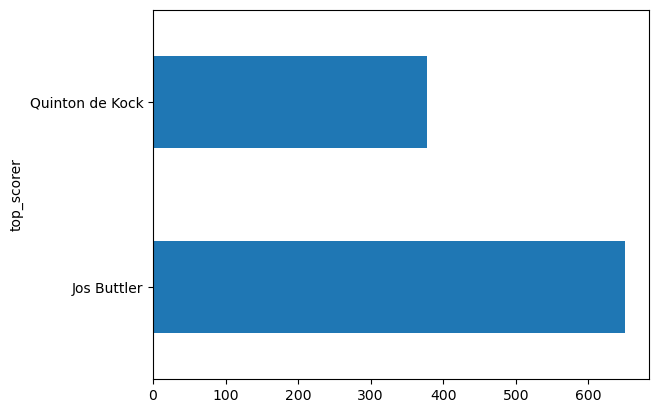

In [319]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high.plot(kind = 'barh')

10 Best Bowling Figures

In [322]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [324]:
df['best_bowling_figure'] = df['best_bowling_figure'].apply(lambda x : x.split('--')[0])
df['best_bowling_figure'] = df['best_bowling_figure'].astype(int)
top_bowlers = df.groupby('best_bowling')['best_bowling_figure'].sum().sort_values(ascending=False).head(10)
top_bowlers_df = top_bowlers.reset_index()
top_bowlers_df.columns = ['bowler', 'total_best_figures']

<Axes: xlabel='total_best_figures', ylabel='bowler'>

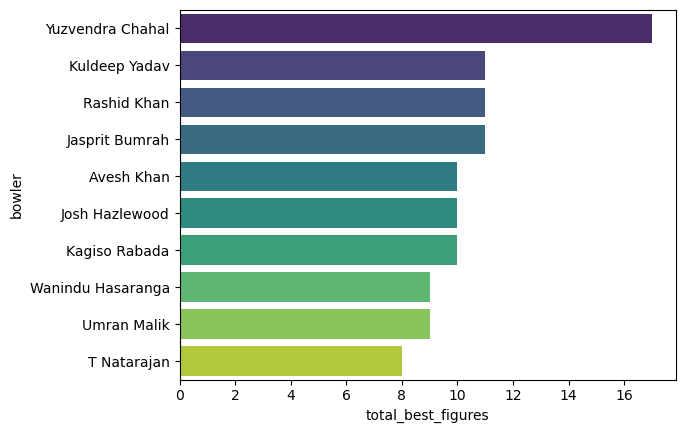

In [326]:
sns.barplot(data=top_bowlers_df, y='bowler', x='total_best_figures', palette='viridis')

###  Venue Analysis

Most Matches Played by Venue

<Axes: ylabel='venue'>

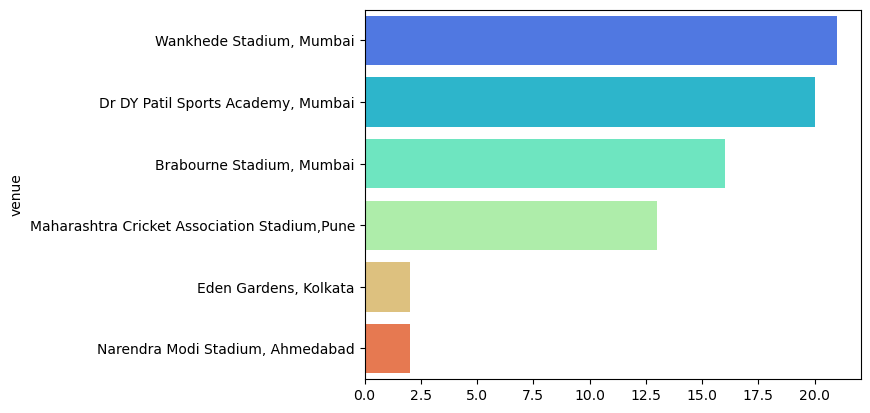

In [334]:
venue_count = df['venue'].value_counts()
sns.barplot(y = venue_count.index,x = venue_count.values,palette='rainbow')

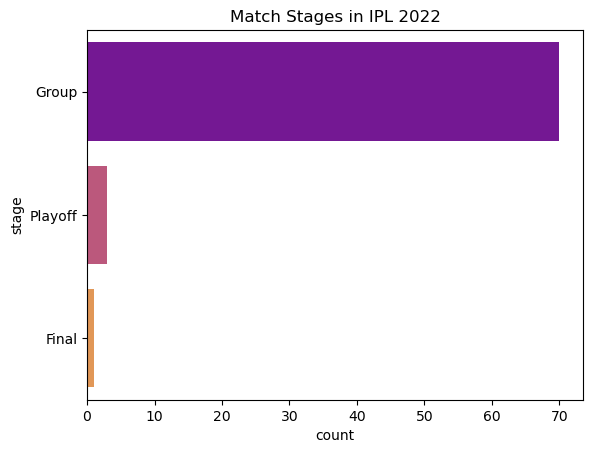

In [43]:
sns.countplot(data=df, y='stage', order=df['stage'].value_counts().index, palette='plasma')
plt.title('Match Stages in IPL 2022')
plt.show()


### Custom Questions & Insights
Q1: Who won the highest margin by runs?

In [344]:
df[df['won_by']== 'Runs'].sort_values(by = 'margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


Q2: Which player had the highest individual score?

In [350]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


Q3: Which bowler had the best bowling figures?

In [356]:
df[df['best_bowling_figure'] == df['best_bowling_figure'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5
39,Umran Malik,5
53,Wanindu Hasaranga,5
55,Jasprit Bumrah,5


# Good Work